In [39]:
import numpy as np

In [40]:
data = np.loadtxt('data.csv', delimiter=',')
X = data[:, 0]
y = data[:, -1]

In [41]:
def mse(w1):
    y_pred = 2 + (w1 * X)
    return np.mean((y - y_pred) ** 2)

In [42]:
mse(1)

139.60271462

In [43]:
def log_likelihood(w_1):
    # Calculate the residuals: (y_i - (2 + w_1*x_i))
    residuals = y - (2 + w_1 * X)
    sigma = 4
    sigma_squared = sigma**2
    
    # Calculate the log likelihood
    ll = -len(y)/2 * np.log(2 * np.pi * sigma_squared) - np.sum(residuals**2) / (2 * sigma_squared)
    
    return ll

In [44]:
log_likelihood(1)

-333.3908863099782

In [45]:
import scipy.optimize as opt

w1_init = 0
w1_hat_mse = opt.fmin(mse, w1_init)
w1_hat_mse

Optimization terminated successfully.
         Current function value: 14.069906
         Iterations: 28
         Function evaluations: 56


array([3.0071875])

In [46]:
def log_likelihood_inv(w_1):
    # Calculate the residuals: (y_i - (2 + w_1*x_i))
    residuals = y - (2 + w_1 * X)
    sigma = 4
    sigma_squared = sigma**2
    
    # Calculate the log likelihood
    ll = -len(y)/2 * np.log(2 * np.pi * sigma_squared) - np.sum(residuals**2) / (2 * sigma_squared)
    
    return -ll

w1_init = 0
w1_hat_ll = opt.fmin(log_likelihood_inv, w1_init)
w1_hat_ll

Optimization terminated successfully.
         Current function value: 137.245873
         Iterations: 28
         Function evaluations: 56


array([3.0071875])

In [47]:
import matplotlib.pyplot as plt

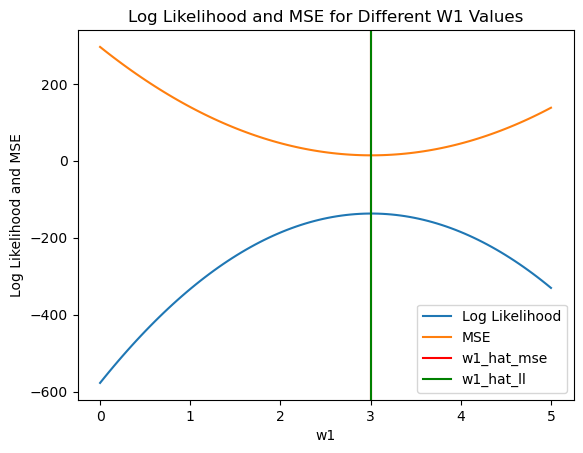

In [48]:
linspace = np.linspace(0, 5, 100)

plt.plot(linspace, [log_likelihood(w1) for w1 in linspace])
plt.plot(linspace, [mse(w1) for w1 in linspace])
plt.axvline(w1_hat_mse, color='r')
plt.axvline(w1_hat_ll, color='g')
plt.legend(['Log Likelihood', 'MSE', 'w1_hat_mse', 'w1_hat_ll'])
plt.title('Log Likelihood and MSE for Different W1 Values')
plt.xlabel('w1')
plt.ylabel('Log Likelihood and MSE')
plt.show()